# Tutorials
Source: https://docs.lightkurve.org/tutorials/index.html
## LightCurve objects

**Subclasses of LightCurve objects:**
- `KeplerLightCurve` for Kepler and K2 data
- `TessLightCurve`for TESS data

In [1]:
# 0. import
from lightkurve import search_targetpixelfile

In [2]:
# 1. open a Target Pixel File from MAST
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# 2. convert target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [3]:
print(type(tpf))
print(type(lc))

<class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>
<class 'lightkurve.lightcurve.KeplerLightCurve'>


**Definitions**
- Simple Aperture Photometry = simple act of summing up values of all the pixels in a pre-defined aperture, as a function of time
=> choose the shape of the aperture mask to avoid nearby contaminants or improve the strentgh of the specific signal we are trying to measure relative to the background.

- aperture_mask: the default is to use the Kepler pipeline aperture; we can create our own aperture with a boolean numpy array. See cell below.
=> By summing up all the pixels in the aperture, we created a Simple Aperture Photometry (SAP) lightcurve

In [4]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

In [6]:
lc.head()

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
352.37632485035283,43689.1484375,6.631562232971191,683.1803253801079,190.5726135863067,11914,0
352.3967580484896,43698.078125,6.631830215454102,683.1799393446446,190.57243877622443,11915,8192
352.4376244455707,43694.10546875,6.6317877769470215,683.1796254892746,190.57267573478472,11917,16
352.45805764463876,43698.31640625,6.631948947906494,683.1797879898063,190.572495708295,11918,0
352.4784908439324,43687.6484375,6.631504535675049,683.1792868369076,190.5724646436399,11919,0


In [7]:
# check metadata of the light curve
lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False],
        [False, False,  True,  True, False],
        [False, False,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False,  True, False]]),
 'TARGETID': 6922244,
 'LABEL': 'KIC 6922244',
 'CHANNEL': 31,
 'CAMPAIGN': None,
 'QUARTER': 4,
 'MISSION': 'Kepler',
 'RA': 281.28812,
 'DEC': 42.45108}

In [12]:
# time and flux attributes: one flux point for every time stamp
lc.time

<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]>

In [13]:
lc.flux

<Quantity [43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
           43151.562] electron / s>

In [15]:
# Check Combined Differential Photometric Precision (CDPP) noise metric of the lightcurve using the built in method estimate_cdpp()
lc.estimate_cdpp()

<Quantity 75.29876612 ppm>

See
[estimate_cdpp()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.estimate_cdpp.html?highlight=estimate_cdpp#lightkurve.LightCurve.estimate_cdpp)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

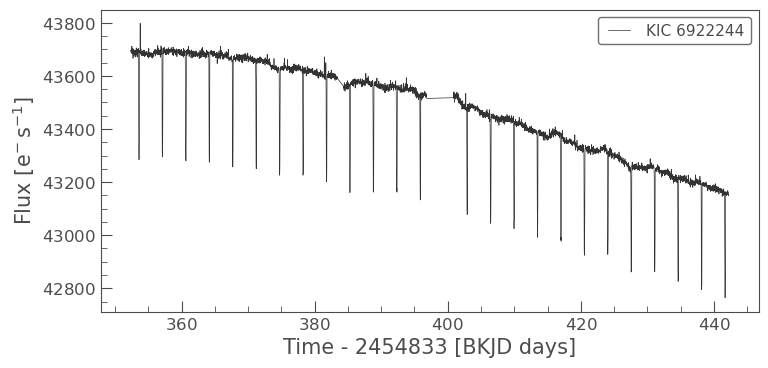

In [18]:
# plot
%matplotlib inline
lc.plot()

### Useful LightCurve methods
- [flatten()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.flatten.html?highlight=flatten#lightkurve.LightCurve.flatten): Remove long term trends using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)

- [remove_outliers()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_outliers.html?highlight=remove_outliers#lightkurve.LightCurve.remove_outliers): Remove outliers using simple sigma clipping

- [remove_nans()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_nans.html?highlight=remove_nans#lightkurve.LightCurve.remove_nans): Remove infinite or NaN values (these can occur during thruster firings)

- [fold()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.fold.html?highlight=fold#lightkurve.LightCurve.fold): Fold the data at a particular period

- [bin()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.bin.html?highlight=bin#lightkurve.LightCurve.bin): Reduce the time resolution of the array, taking the average value in each bin.

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

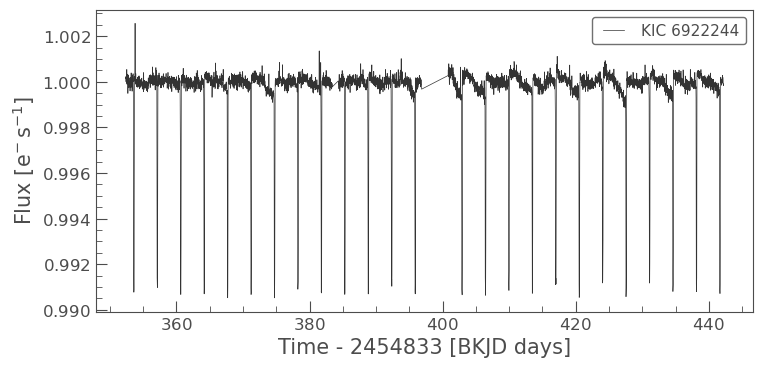

In [19]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

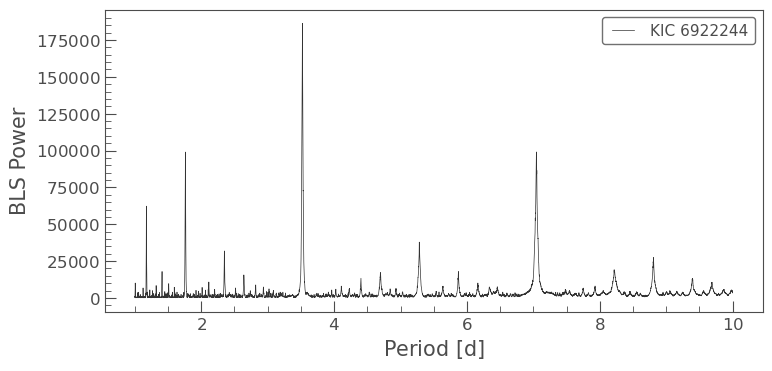

In [24]:
import numpy as np
periodogram = lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()

In [26]:
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

Best fit period:  3.52300 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

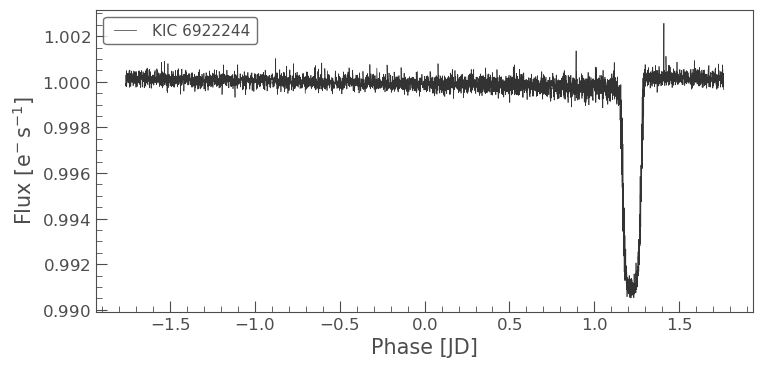

In [27]:
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

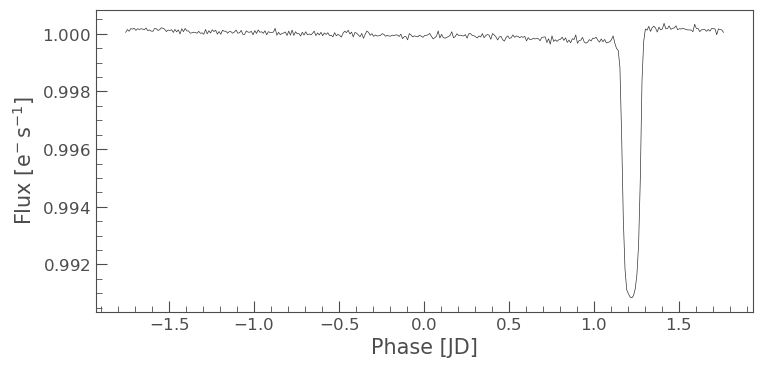

In [28]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()